# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset

In [3]:
import pandas as pd
df = pd.read_csv('5DATA002W.2 Coursework Dataset(25012025v6.0).csv')
df.head()

,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


# Initial exploration

In [4]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


(4024, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 

In [5]:
df['Mortality_Status'] = df['Mortality_Status'].str.lower().map({
    'alive': 'Alive',
    'dead': 'Dead'
})
df['Mortality_Status'].unique()
df['Mortality_Status'].value_counts()

Mortality_Status
Alive    3408
Dead      616
Name: count, dtype: int64

# Drop irrelevant columns

In [ ]:
df.drop(['Patient_ID', 'Month_of_Birth'], axis=1, inplace=True)

# Encode categorical columns

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Fix missing values

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
print(df.isnull().sum())

Age                       0
Sex                       0
Occupation                0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


# Distribution of target (Mortality Status)

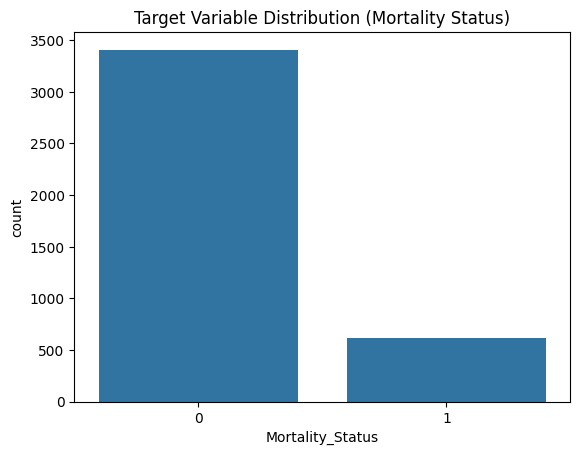

In [ ]:
sns.countplot(x='Mortality_Status', data=df)
plt.title("Target Variable Distribution (Mortality Status)")
plt.show()

# Create classification dataset

In [ ]:
classification_data = df.copy()
classification_data.drop('Survival_Months', axis=1, inplace=True)

# Create regression dataset (only dead patients)

In [ ]:
regression_data = df[df['Mortality_Status'] == 1].copy()
regression_data.drop('Mortality_Status', axis=1, inplace=True)

# Save processed versions

In [ ]:
.to_csv("classification_data.csv", index=False)
regression_data.to_csv("regression_data.csv", index=False)classification_data